# Task 2



In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [40]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


## Data Preprocessing

In [10]:
# Check data columns and shape
print(df.columns)
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')
The dataset has 50000 rows and 14 columns


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

In [12]:
# Stastic summary of the dataset
df.describe().style.background_gradient(cmap="Greens")

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.044560,9.066340,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.887670,5.412660,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [13]:
# Check for null values
df.isnull().sum()/len(df)*100

num_passengers           0.0
sales_channel            0.0
trip_type                0.0
purchase_lead            0.0
length_of_stay           0.0
flight_hour              0.0
flight_day               0.0
route                    0.0
booking_origin           0.0
wants_extra_baggage      0.0
wants_preferred_seat     0.0
wants_in_flight_meals    0.0
flight_duration          0.0
booking_complete         0.0
dtype: float64

In [14]:
# Check for duplicates
dup_vals = df.duplicated().sum()
print(f'There are {dup_vals} duplicate values in the dataset')

There are 719 duplicate values in the dataset


In [15]:
#Drop the duplicates from the dataset
df.drop_duplicates(inplace=True)
df.shape

(49281, 14)

In [16]:
df['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

### About the dataset

- `Data Size`: The dataset has 49281 rows and 14 columns
- `Data Types`: There are features of type int64, float64, object and binary
- There are no missing values in the dataset
- `Unique Values`: There are varies but we can know the unique value in **flight_day** at the first glance to process.
- `Statistical Summary`: The statistical summary of the dataset shows that there are potential outliers or anomalies in the dataset.
- `Irrelavant Features`: The dataset has 14 features, but it seem like all the features are important and useful for the evaluation.

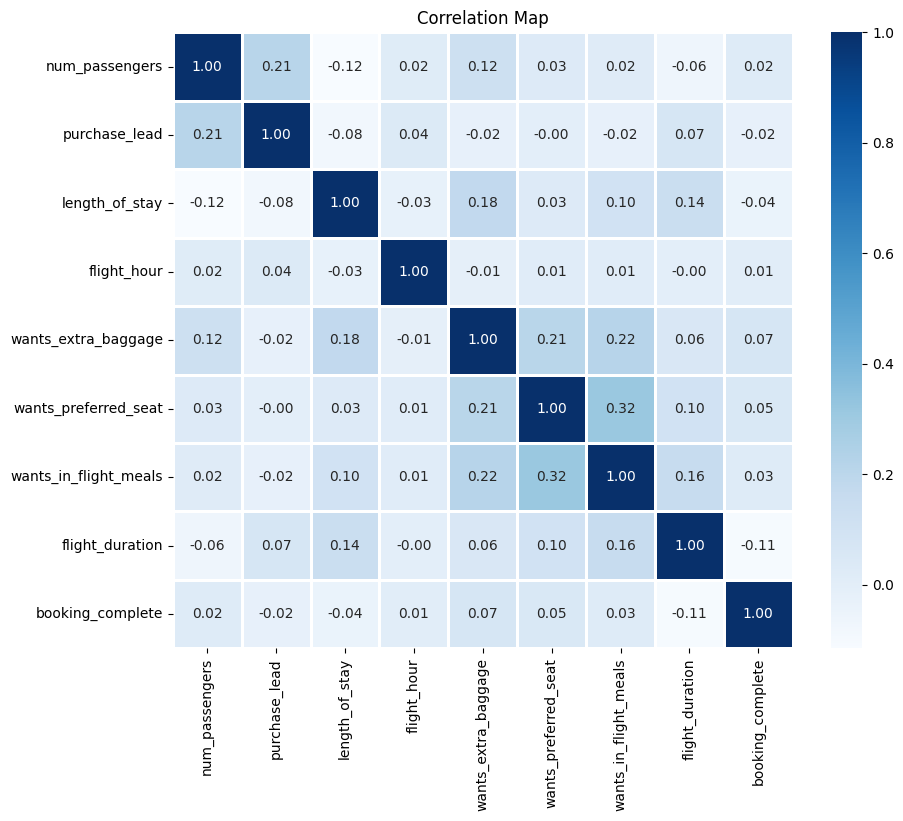

In [17]:
# Plot the correlation map
numeric_df = df.select_dtypes(include=[float, int])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="Blues", fmt='.2f',
            annot_kws=None,
            linewidths=1,
            )
plt.title("Correlation Map")
plt.show()

## EDA

<Figure size 1600x800 with 0 Axes>

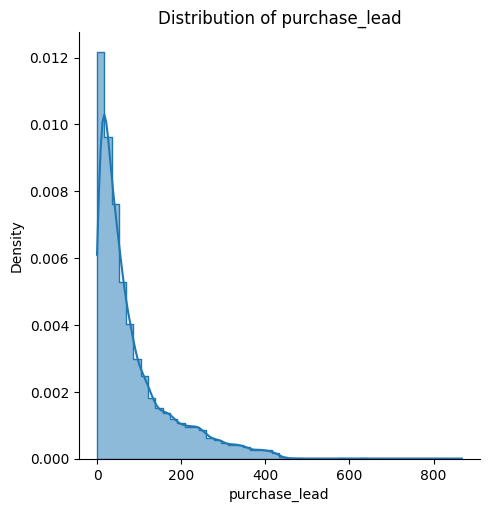

In [18]:
# Distribution of the number of passengers travelling
plt.figure(figsize=(16, 8))
sns.displot(df['purchase_lead'], stat='density', kind='hist', kde=True, bins=50,
            element='step', fill=True)
plt.title("Distribution of purchase_lead")
plt.show()

In [21]:
import random
# Function to generate random colors
def generate_random_colors(n):
    return ['#' + ''.join(random.choices('0123456789ABCDEF', k=6)) for _ in range(n)]

Text(0, 0.5, 'Counts')

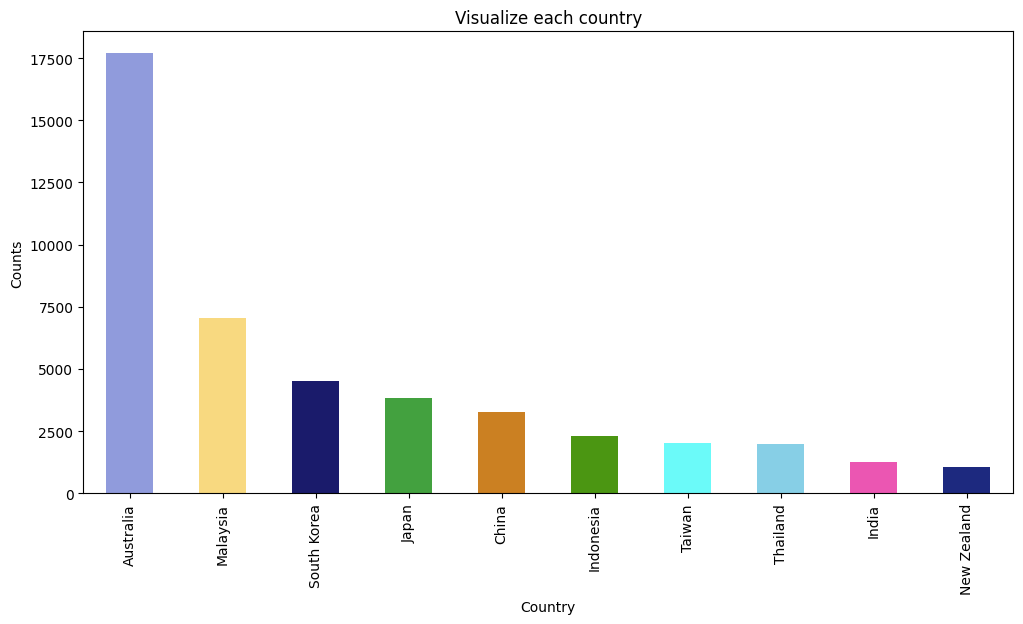

In [22]:
# Plot a bar chart to show the top 10 most demanding origin
top_origins = df['booking_origin'].value_counts().nlargest(10)
top_origins_colors = generate_random_colors(len(top_origins))
top_origins.plot(kind='bar', figsize=(12, 6), color=top_origins_colors)
plt.title("Visualize each country")
plt.xlabel("Country")
plt.xticks(rotation=90)
plt.ylabel("Counts")


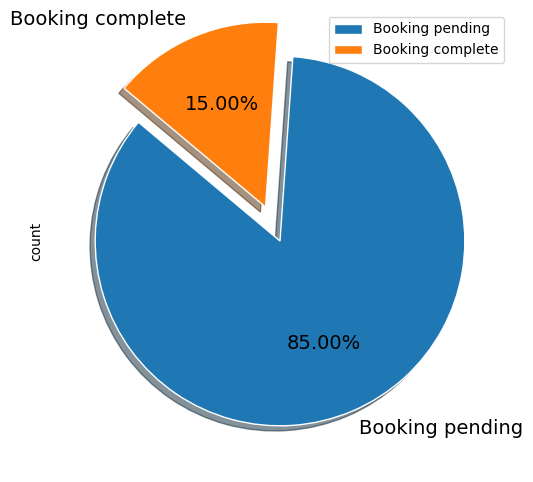

In [23]:
df['booking_complete'].value_counts().plot(kind='pie',
                                           explode=[0, 0.2],
                                           labels = ["Booking pending", "Booking complete"],
                                           colors=['#1f77b4', '#ff7f0e'],
                                           fontsize=14,
                                           wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
                                           textprops={'fontsize': 14},
                                           legend=True,
                                           autopct='%1.2f%%',
                                           shadow=True,
                                           startangle=140,
                                           figsize=(12, 6))
plt.show()

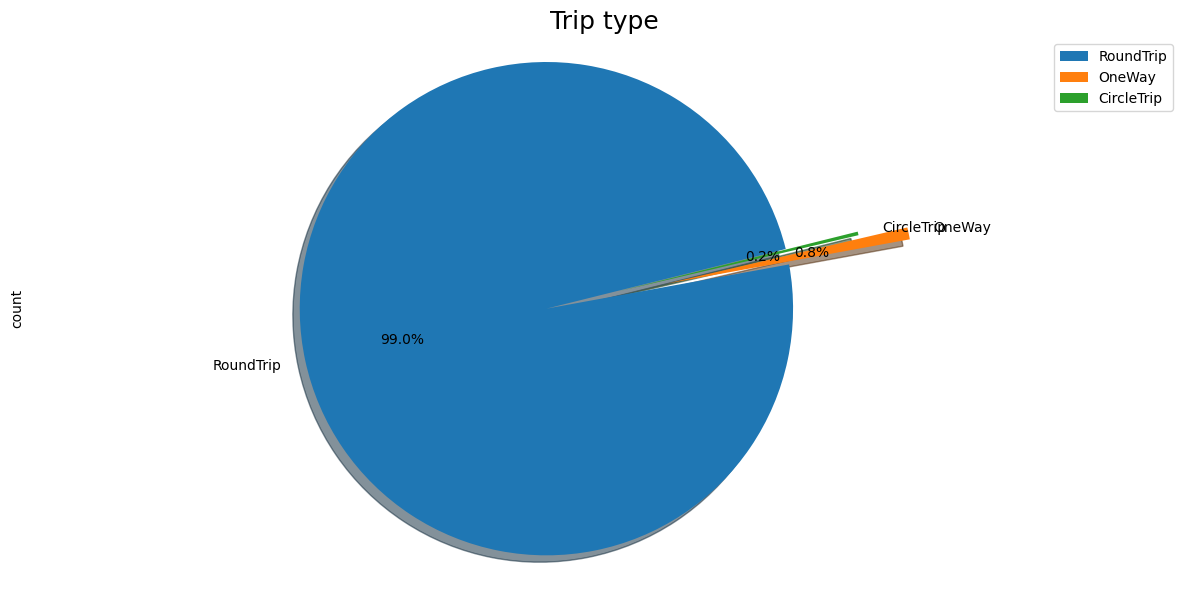

In [24]:
trip_type=['trip_type']
for i, col in enumerate(trip_type):
    plt.figure(figsize=(12,6))
    df[col].value_counts().plot(kind='pie', explode=[0, 0.5, 0.3], 
                                autopct='%1.1f%%', 
                                shadow=True, 
                                startangle=14,
                                labels = ["RoundTrip", "OneWay", "CircleTrip"],
                                colors=['#1f77b4', '#ff7f0e', '#2ca02c'],
                                legend=True)
    plt.title("Trip type", fontsize=18)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

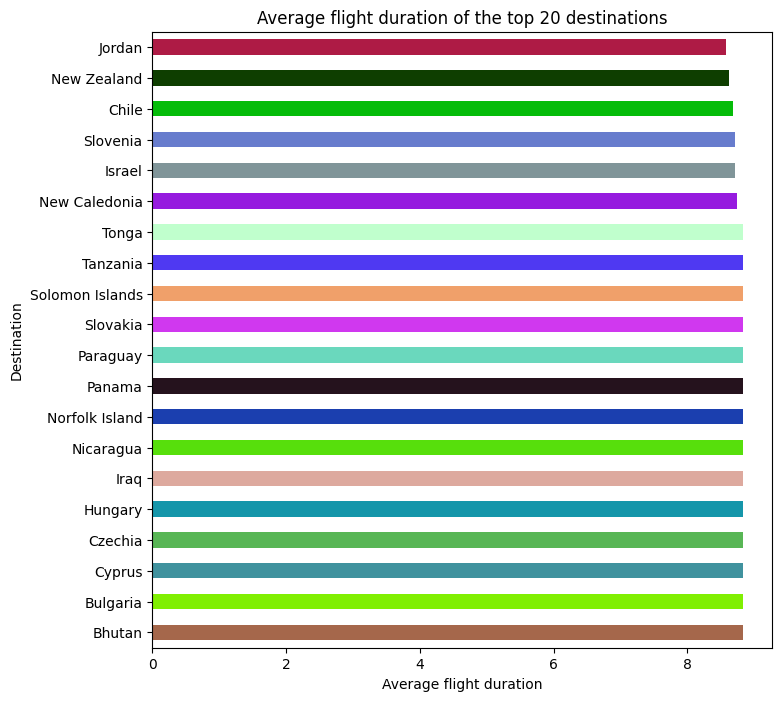

In [25]:
# Find the average flight duration of the top 20 destinations
avg_flight = df.groupby('booking_origin')['flight_duration'].mean().nlargest(20)
avg_flight_colors = generate_random_colors(len(avg_flight))
avg_flight.plot(kind='barh', figsize=(8, 8), color=avg_flight_colors)
plt.title("Average flight duration of the top 20 destinations")
plt.xlabel("Average flight duration")
plt.ylabel("Destination")
plt.show()

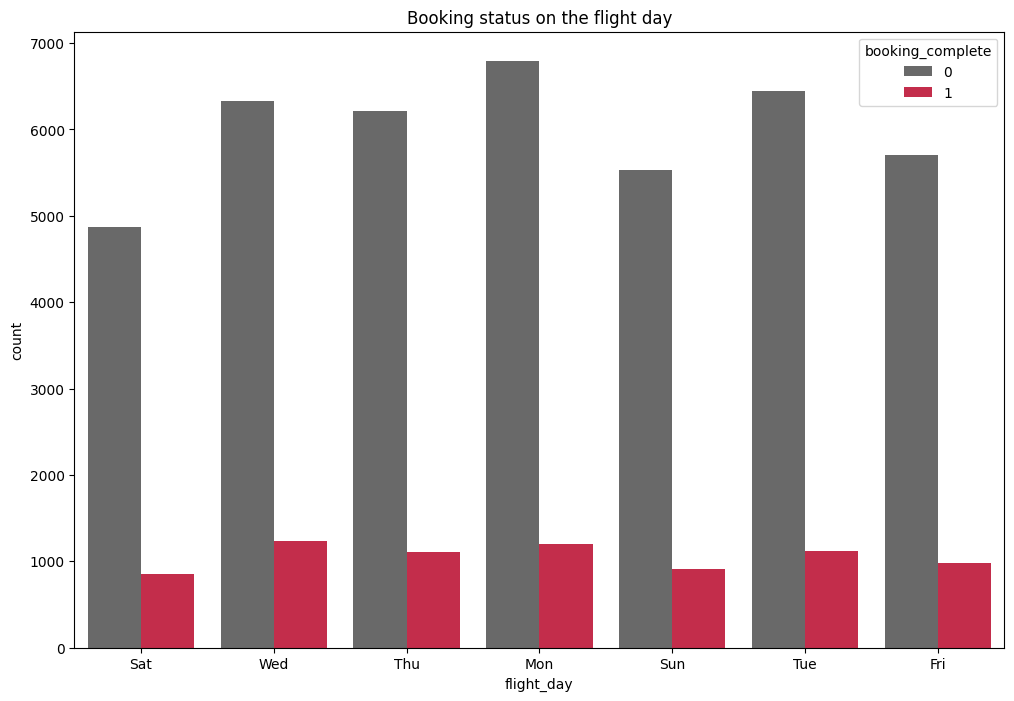

In [26]:
# Create countplot to understand the booking status on the flight day
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='flight_day', hue='booking_complete', palette=['dimgrey', 'crimson'])
plt.title("Booking status on the flight day")
plt.show()

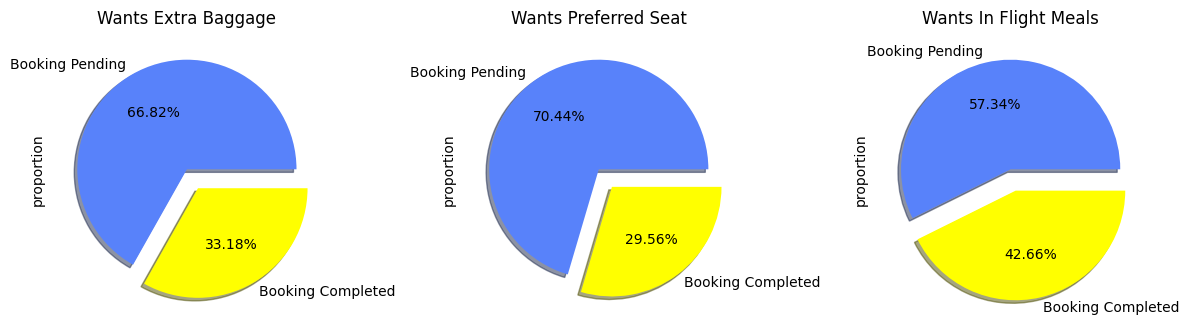

In [27]:
#Create dataframe for the extra
data_plus = ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']
plt.figure(figsize=(12, 8))
colors = ['#5882fa', '#ffff00'] 
explode = (0, 0.2)
autopct='%1.2f%%'
shadow=True
for i, col in enumerate(data_plus):
    plt.subplot(1, 3, i+1)
    series = df[col].value_counts(normalize=True)  # Normalize to get proportions
    # Plot a pie chart for the normalized data
    series.plot(kind='pie', labels=['Booking Pending', 'Booking Completed'], colors=colors, autopct='%1.2f%%', shadow=True, explode=explode)
    plt.title(col.replace('_', ' ').title())
plt.tight_layout()
plt.show()   

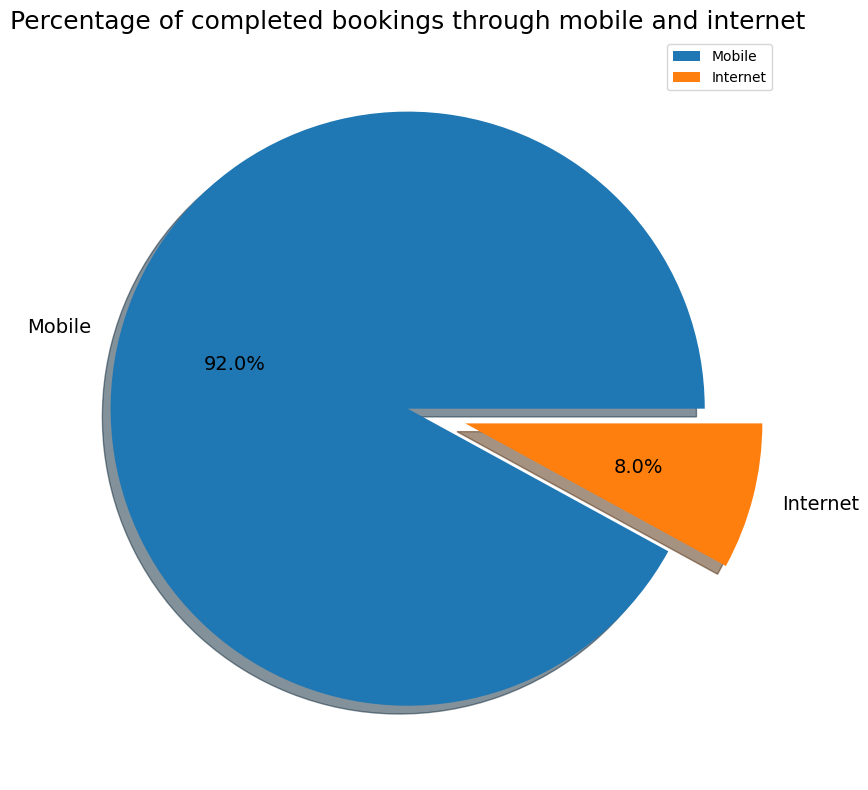

In [28]:
# Compare % of completed bookings through mobile and internet
mobinet = df.groupby('sales_channel')['booking_complete'].sum()
plt.figure(figsize=(12, 8))
plt.pie(mobinet, labels=['Mobile', 'Internet'], colors=['#1f77b4', '#ff7f0e'],
        autopct='%1.1f%%',
        shadow=True,
        explode=[0, 0.2],
        textprops={'fontsize': 14})

plt.title("Percentage of completed bookings through mobile and internet", fontsize=18)
plt.tight_layout()
plt.legend()
plt.show()

In [29]:
# Create dataframe for RoundTrip and  find which day most of the ticker
roundtrip = df[df['trip_type'] == 'RoundTrip']
roundtrip.groupby('flight_day')['booking_complete'].value_counts().sort_values(ascending=False).unstack()\
.style.background_gradient(cmap='Greens')

booking_complete,0,1
flight_day,,
Fri,5647,971
Mon,6724,1191
Sat,4809,853
Sun,5465,911
Thu,6151,1104
Tue,6350,1114
Wed,6267,1222


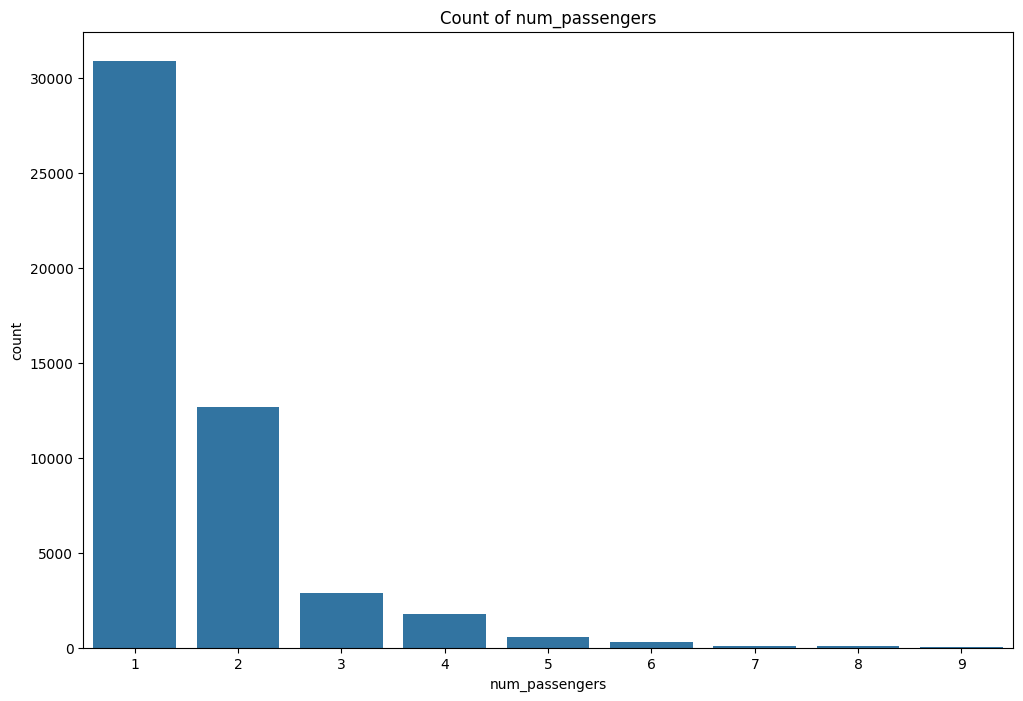

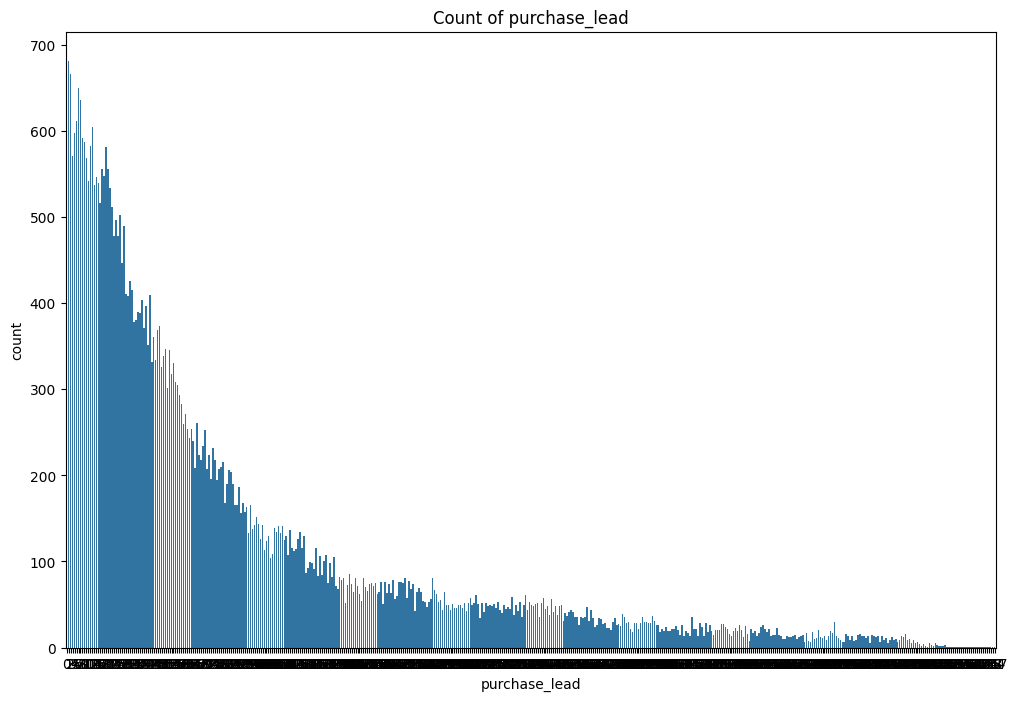

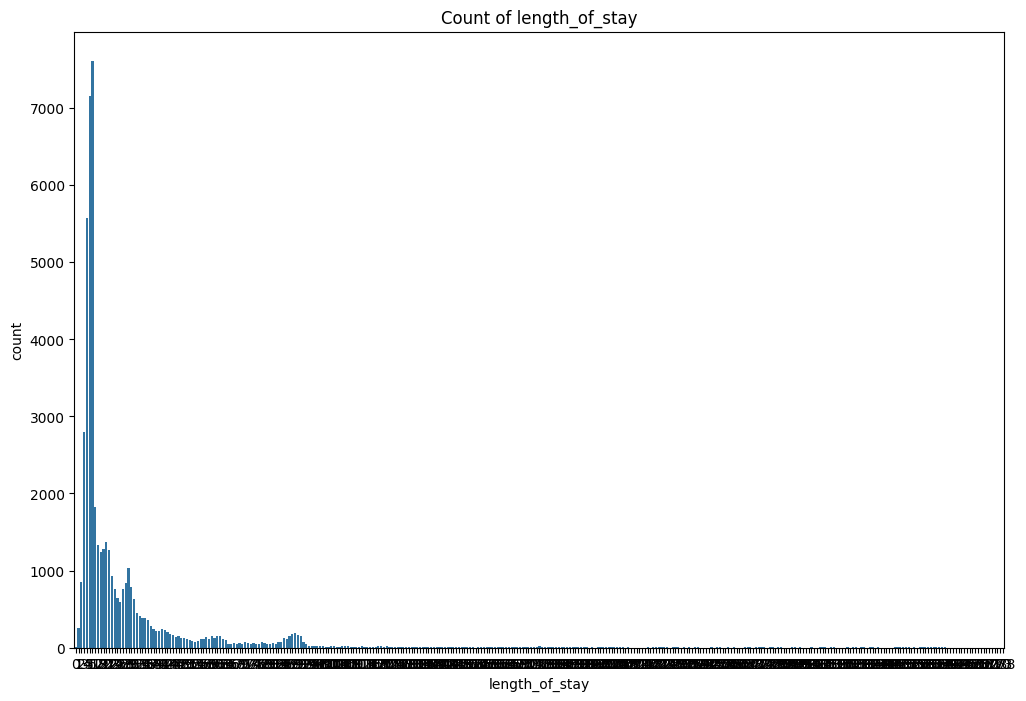

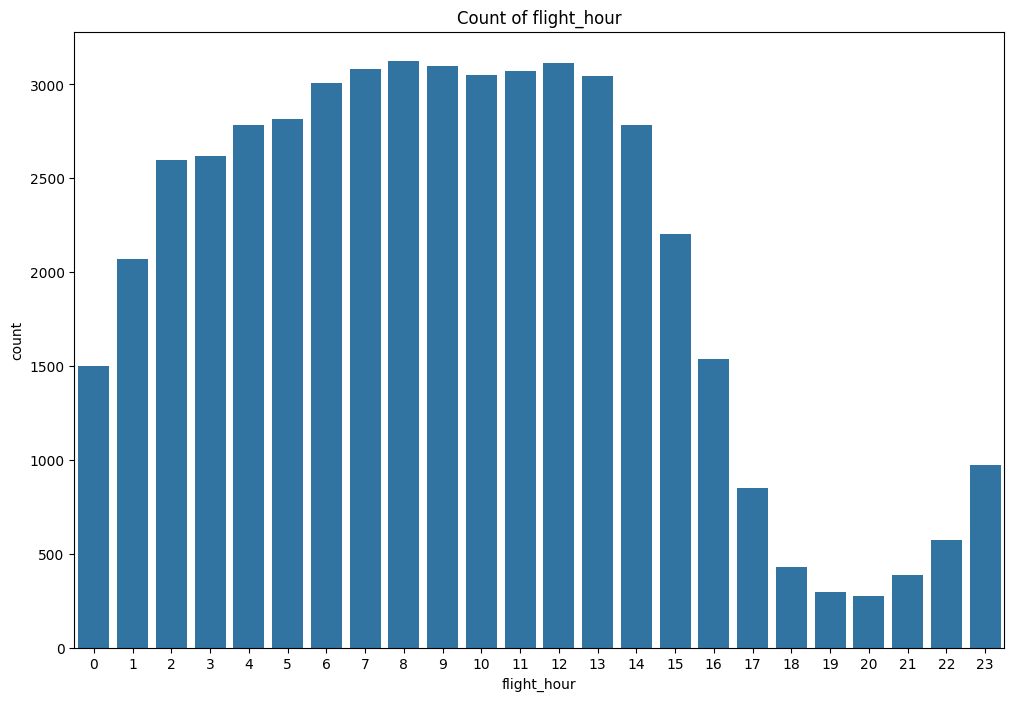

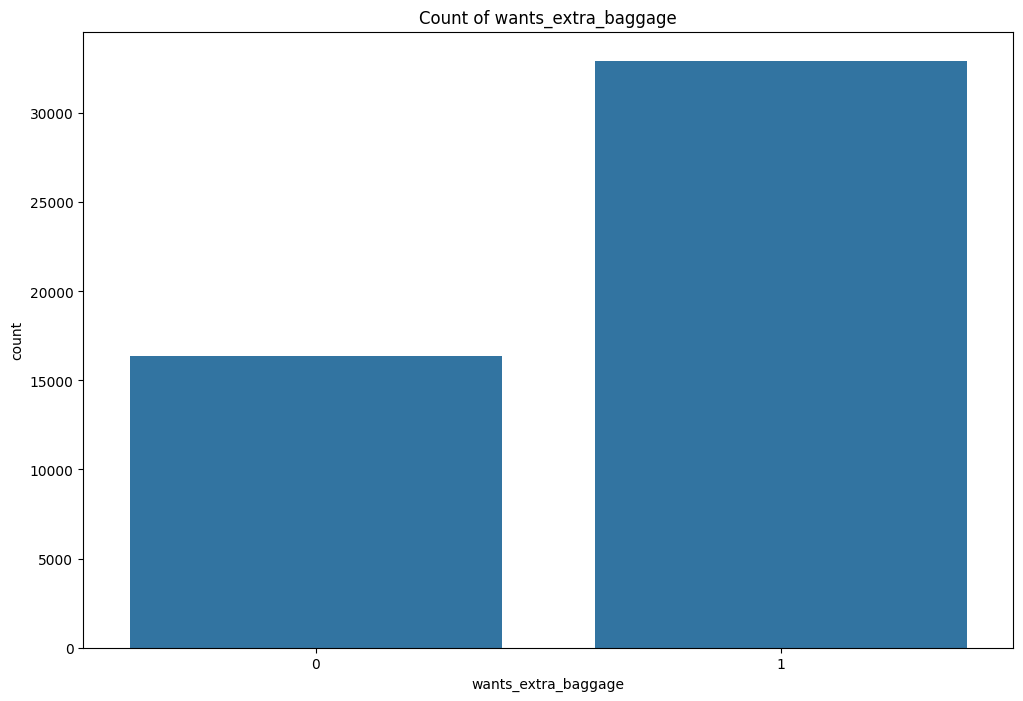

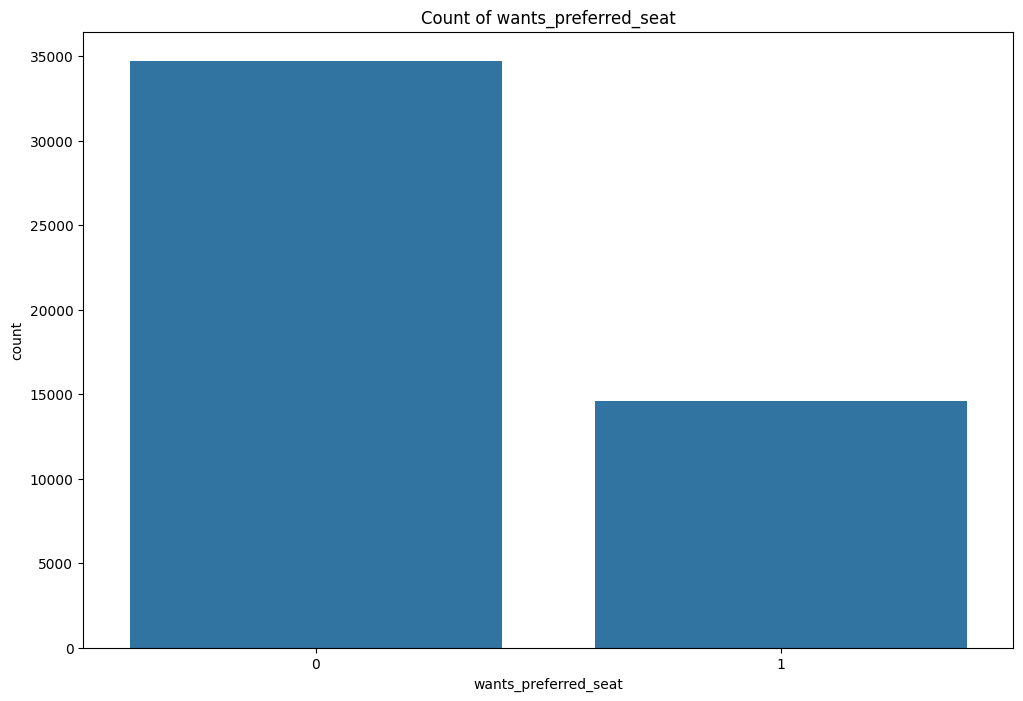

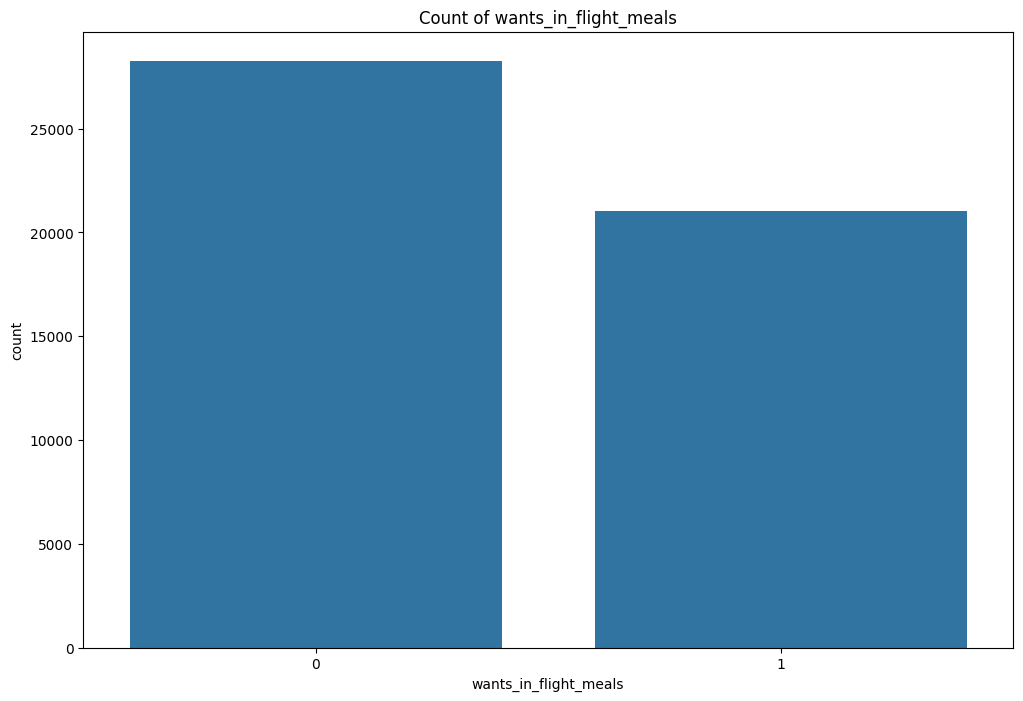

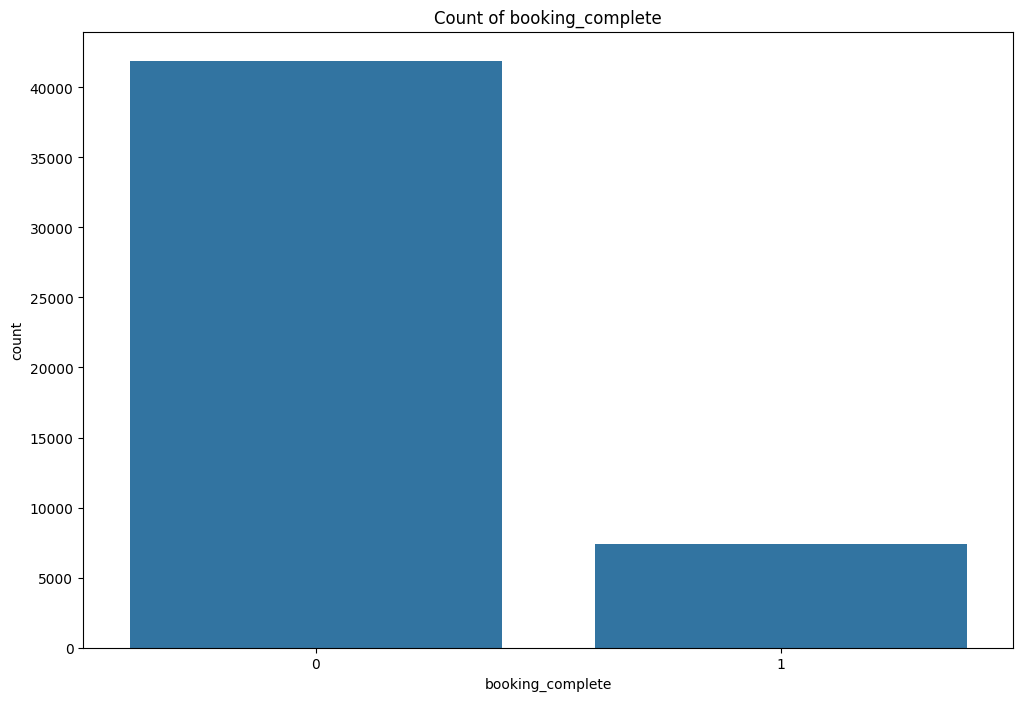

In [30]:
# Create a countplot to understand the each values in data
for i in df.select_dtypes(include='int'):
    plt.figure(figsize=(12, 8))
    sns.countplot(data=df, x=df[i])
    plt.xlabel(f"{i}")
    plt.title(f"Count of {i}")
    plt.show()

In [31]:
pd.pivot_table(df, index='booking_origin', columns='flight_day', values='booking_complete', aggfunc='count').style.background_gradient(cmap='icefire')

flight_day,Fri,Mon,Sat,Sun,Thu,Tue,Wed
booking_origin,,,,,,,
(not set),11.000000,14.000000,1.000000,12.000000,13.000000,13.000000,14.000000
Afghanistan,nan,nan,nan,nan,1.000000,nan,nan
Algeria,nan,nan,nan,nan,1.000000,nan,nan
Argentina,nan,1.000000,nan,nan,3.000000,1.000000,1.000000
Australia,2357.000000,2845.000000,2049.000000,2251.000000,2766.000000,2667.000000,2756.000000
Austria,1.000000,2.000000,nan,2.000000,1.000000,nan,2.000000
Bahrain,nan,nan,2.000000,nan,3.000000,nan,nan
Bangladesh,3.000000,3.000000,5.000000,5.000000,8.000000,7.000000,5.000000
Belarus,1.000000,nan,nan,nan,nan,nan,nan


## Machine Learning Modeling

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [42]:
# Convert categorical columns to numeric
for col in df.select_dtypes(include='object').columns:
    label_encoder = LabelEncoder()
    label_encoder.fit(df[col].unique())
    df[col] = label_encoder.transform(df[col])

In [43]:
# Divided the data into dependent and independent variables
X = df.drop(['booking_complete', 'purchase_lead', 'route'], axis=1)
y = df['booking_complete']

In [44]:
#Scaling data  
scaler = StandardScaler()
X = scaler.fit_transform(X)
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Create a function for machine learning model
def model_building(model, X_train, X_test, y_train, y_test):
    print(f"Name of the model: {model}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"Accuracy score: {score}")
    print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
    print('Classification report:\n', classification_report(y_test, y_pred))
    print('__'*20)

In [48]:
#Create all the models into dictionary

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(iterations=1)
}

In [49]:
for i in range(len(models)):
    model = list(models.values())[i]
    name = list(models.keys())[i]
    model_building(model, X_train, X_test, y_train, y_test)

Name of the model: LogisticRegression()
Accuracy score: 0.852
Confusion matrix:
 [[8520    0]
 [1480    0]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      8520
           1       0.00      0.00      0.00      1480

    accuracy                           0.85     10000
   macro avg       0.43      0.50      0.46     10000
weighted avg       0.73      0.85      0.78     10000

________________________________________
Name of the model: DecisionTreeClassifier()


d:\DOWNLOADS\GIT Repo\BA_simulation_task\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\DOWNLOADS\GIT Repo\BA_simulation_task\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\DOWNLOADS\GIT Repo\BA_simulation_task\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Accuracy score: 0.7768
Confusion matrix:
 [[7322 1198]
 [1034  446]]
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      8520
           1       0.27      0.30      0.29      1480

    accuracy                           0.78     10000
   macro avg       0.57      0.58      0.58     10000
weighted avg       0.79      0.78      0.78     10000

________________________________________
Name of the model: RandomForestClassifier()
Accuracy score: 0.8459
Confusion matrix:
 [[8244  276]
 [1265  215]]
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.91      8520
           1       0.44      0.15      0.22      1480

    accuracy                           0.85     10000
   macro avg       0.65      0.56      0.57     10000
weighted avg       0.80      0.85      0.81     10000

________________________________________
Name of the model: KNeighborsClass

d:\DOWNLOADS\GIT Repo\BA_simulation_task\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\DOWNLOADS\GIT Repo\BA_simulation_task\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\DOWNLOADS\GIT Repo\BA_simulation_task\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Accuracy score: 0.8508
Confusion matrix:
 [[8378  142]
 [1350  130]]
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      8520
           1       0.48      0.09      0.15      1480

    accuracy                           0.85     10000
   macro avg       0.67      0.54      0.53     10000
weighted avg       0.80      0.85      0.80     10000

________________________________________
Name of the model: <catboost.core.CatBoostClassifier object at 0x0000020968FFA890>
Learning rate set to 0.5
0:	learn: 0.4994258	total: 12ms	remaining: 0us
Accuracy score: 0.852
Confusion matrix:
 [[8520    0]
 [1480    0]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      8520
           1       0.00      0.00      0.00      1480

    accuracy                           0.85     10000
   macro avg       0.43      0.50      0.46     10000
weighted avg       0

d:\DOWNLOADS\GIT Repo\BA_simulation_task\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\DOWNLOADS\GIT Repo\BA_simulation_task\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\DOWNLOADS\GIT Repo\BA_simulation_task\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

